### Библиотеки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set_style("darkgrid")

import calendar

import sys
sys.path.append('../data')

### Данные

In [2]:
raw_data = pd.read_excel('../data/Project 2_2023.xlsx', sheet_name='Data')
raw_data = raw_data.rename(columns={'Date':'Timestamp'})
raw_data['Timestamp'] = pd.to_datetime(raw_data['Timestamp'])
raw_data.isna().sum() # пропусков нет

Timestamp    0
Income       0
Outcome      0
Balance      0
dtype: int64

In [3]:
# приводим к формату даты
assert pd.to_datetime(raw_data['Timestamp']).dt.hour.unique() == np.array([0]), "указывается часы"
assert pd.to_datetime(raw_data['Timestamp']).dt.minute.unique() == np.array([0]), "указывается минуты"
assert pd.to_datetime(raw_data['Timestamp']).dt.second.unique() == np.array([0]), "указывается секунды"

raw_data['Date'] = pd.to_datetime(raw_data['Timestamp']).dt.date
data = raw_data.copy()

### Визуализация

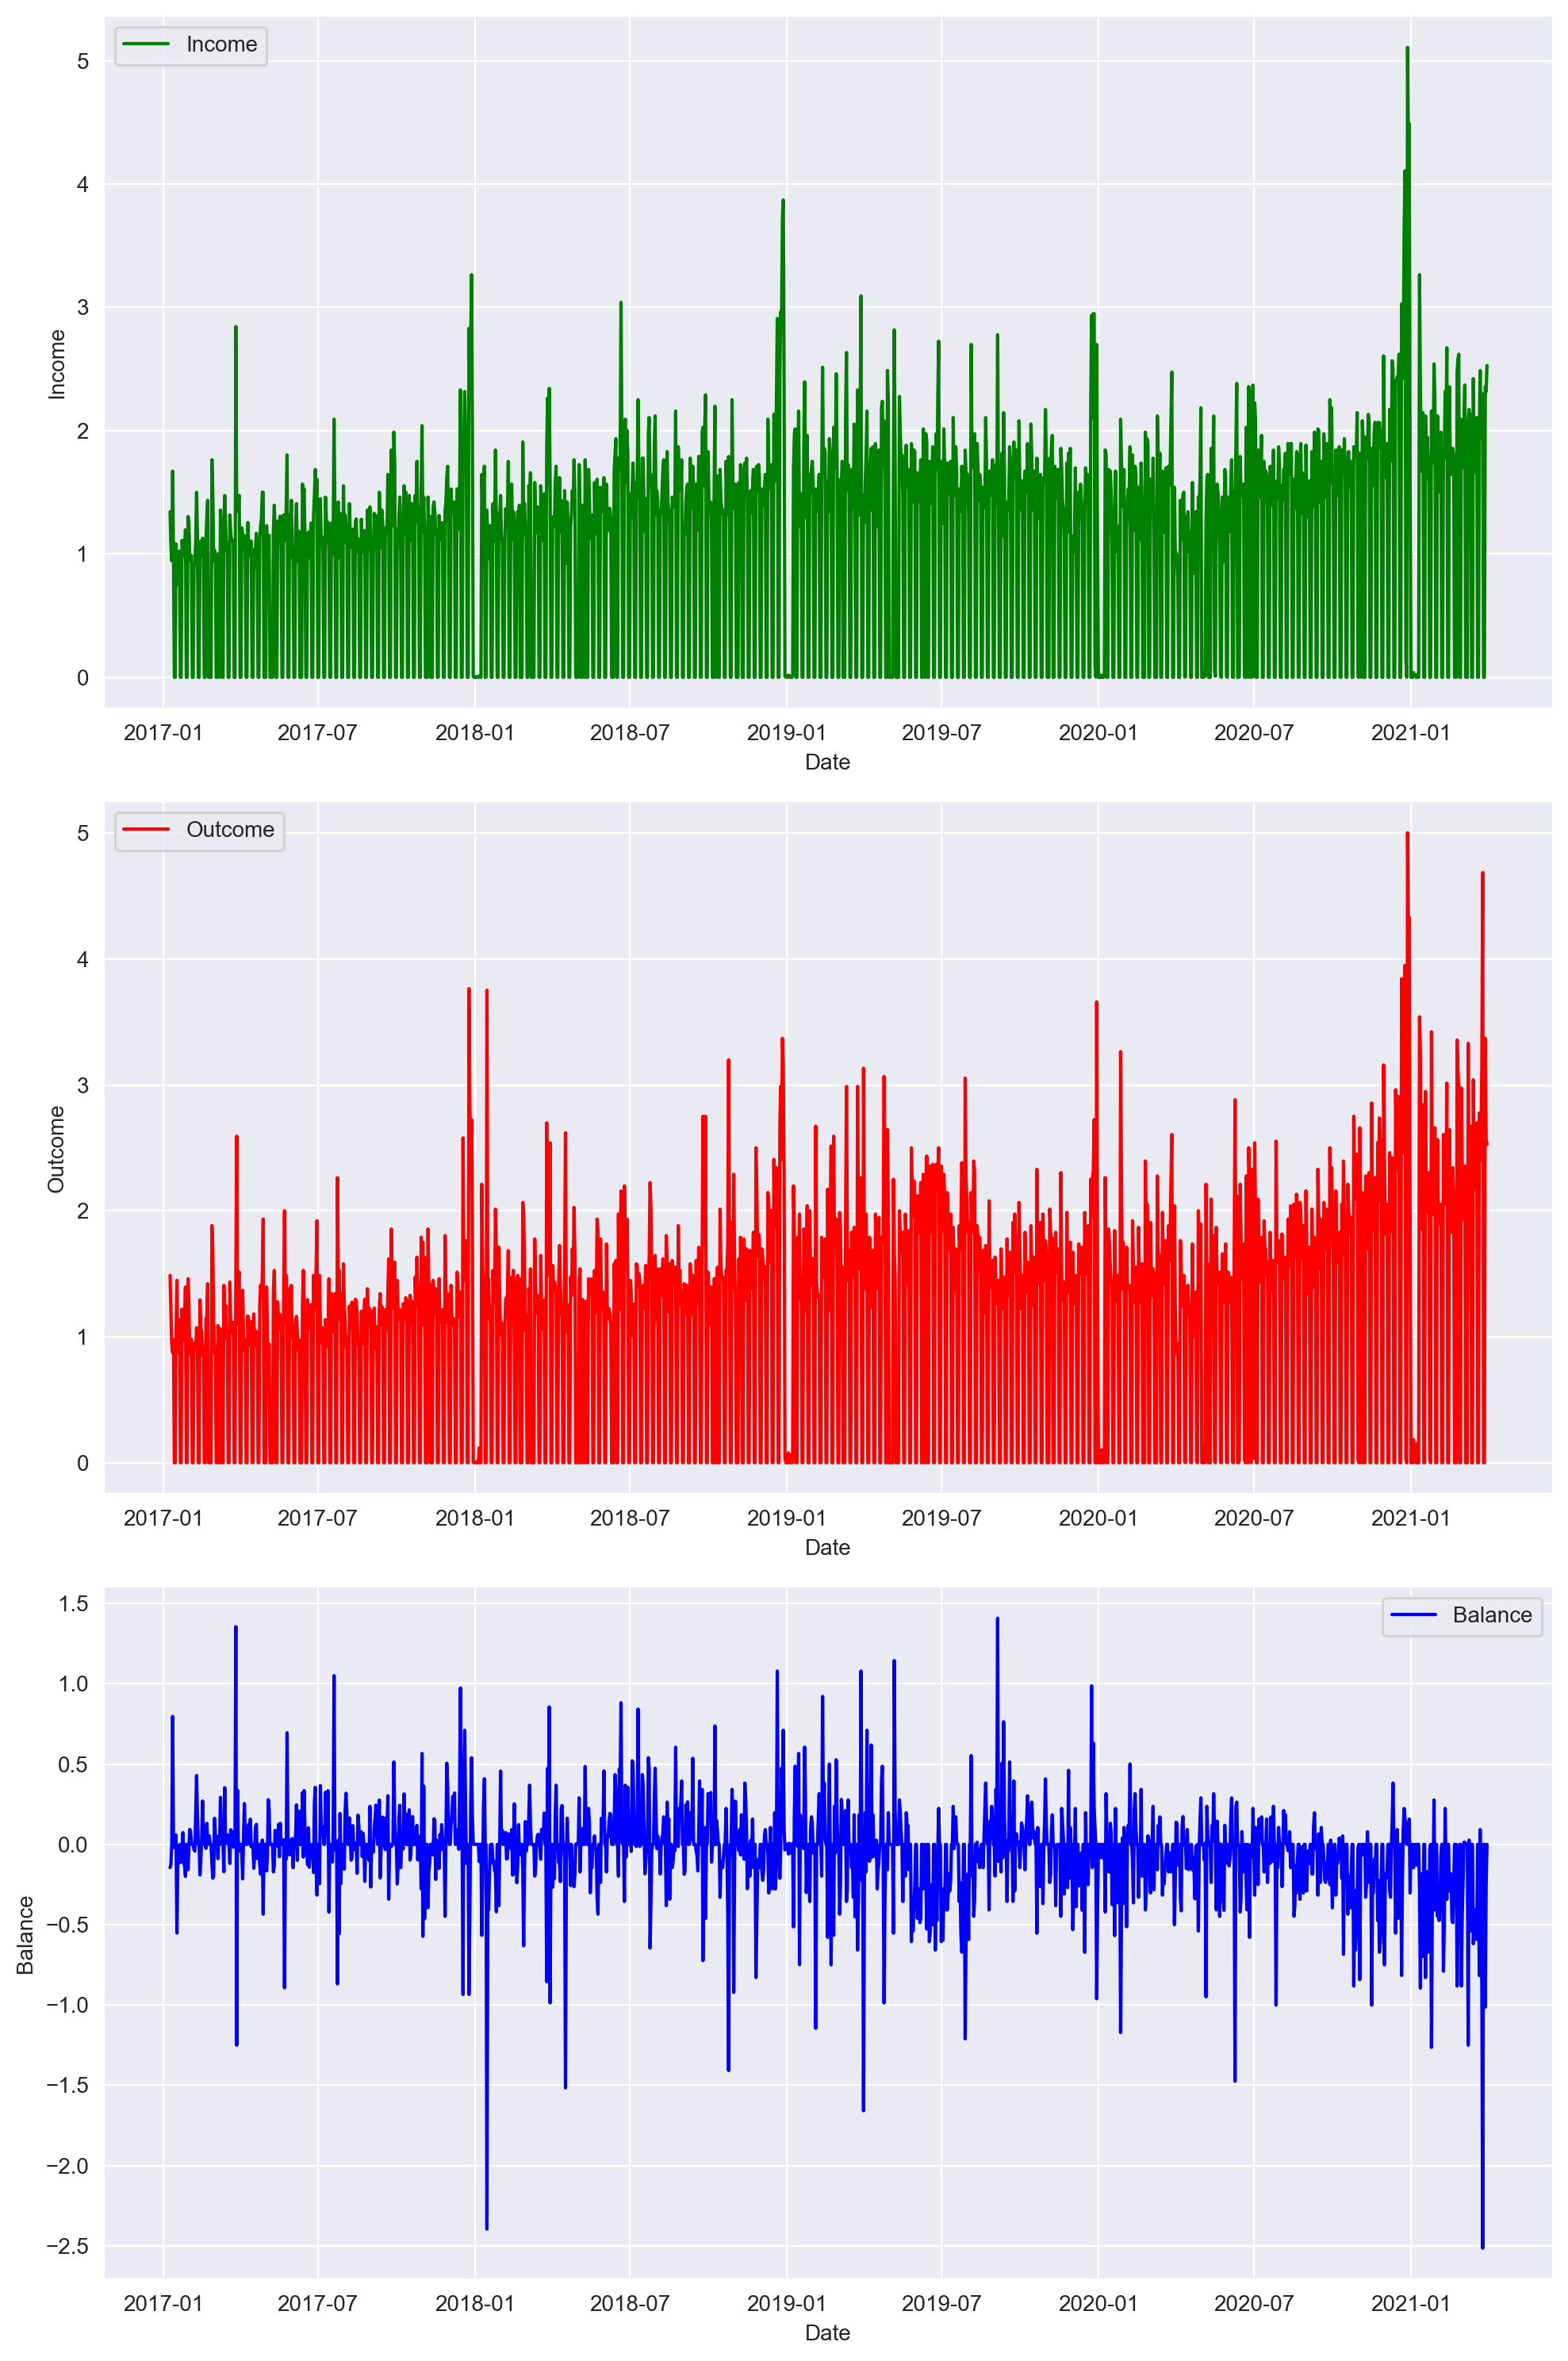

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(data=data, x='Date', y='Income', ax=ax1, color='green', label='Income')


sns.lineplot(data=data, x='Date', y='Outcome', ax=ax2, color='red', label='Outcome')


sns.lineplot(data=data, x='Date', y='Balance', ax=ax3, color='blue', label='Balance')

plt.tight_layout()
plt.show()

__Выводы:__

* На первом и втором графике видны регулрные нулевые значения, причем одновременно на income и outcome
* На третьем графике заметен перевес в сторону отрицательного баланса с 2020 гола (в 2021 году еще сильнее)

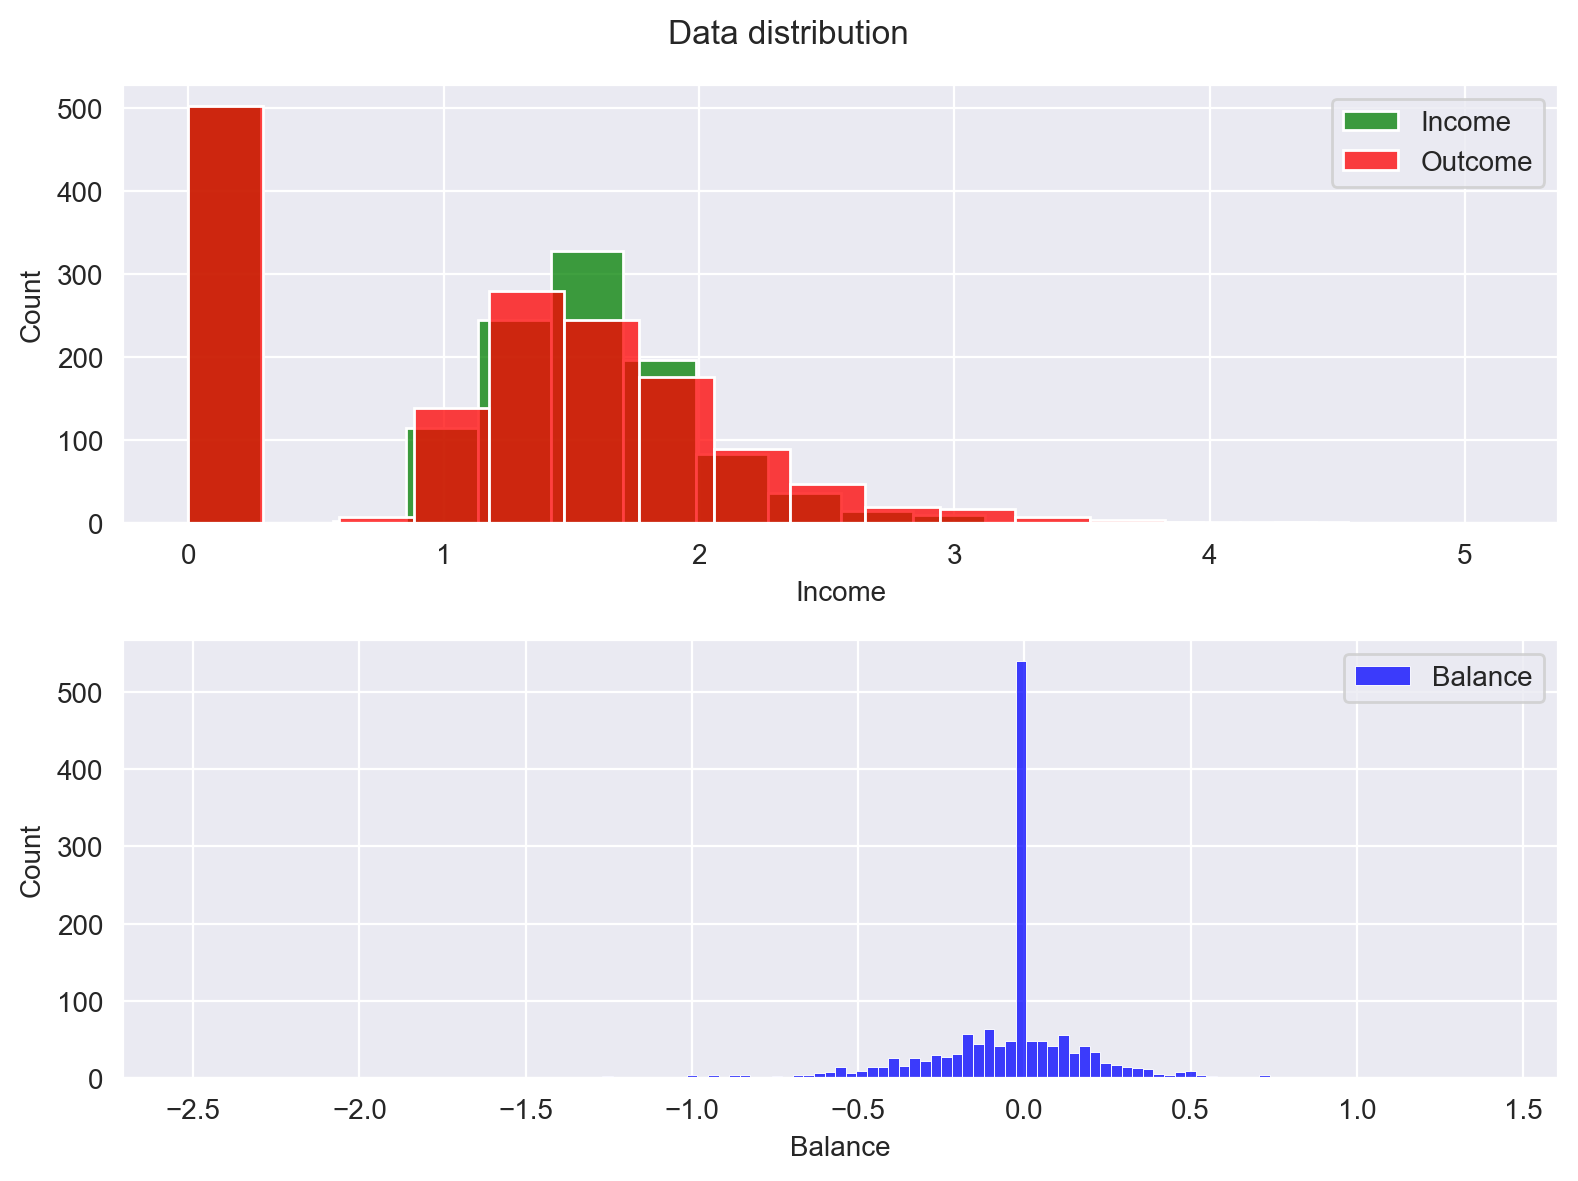

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.histplot(data=data, x='Income', ax=ax1, color='green', label='Income')
sns.histplot(data=data, x='Outcome', ax=ax1, color='red', label='Outcome')
ax1.legend()

sns.histplot(data=data, x='Balance', ax=ax2, color='blue', label='Balance')
ax2.legend()

plt.suptitle('Data distribution')
plt.tight_layout()
plt.show()

__Выводы:__

* Примерно одинаковое кол-во нулей у income и outcome
* Balance имеет тяжелые хвосты

### Учет календарной информации

In [6]:
data['week_day'] = data['Timestamp'].dt.day_of_week

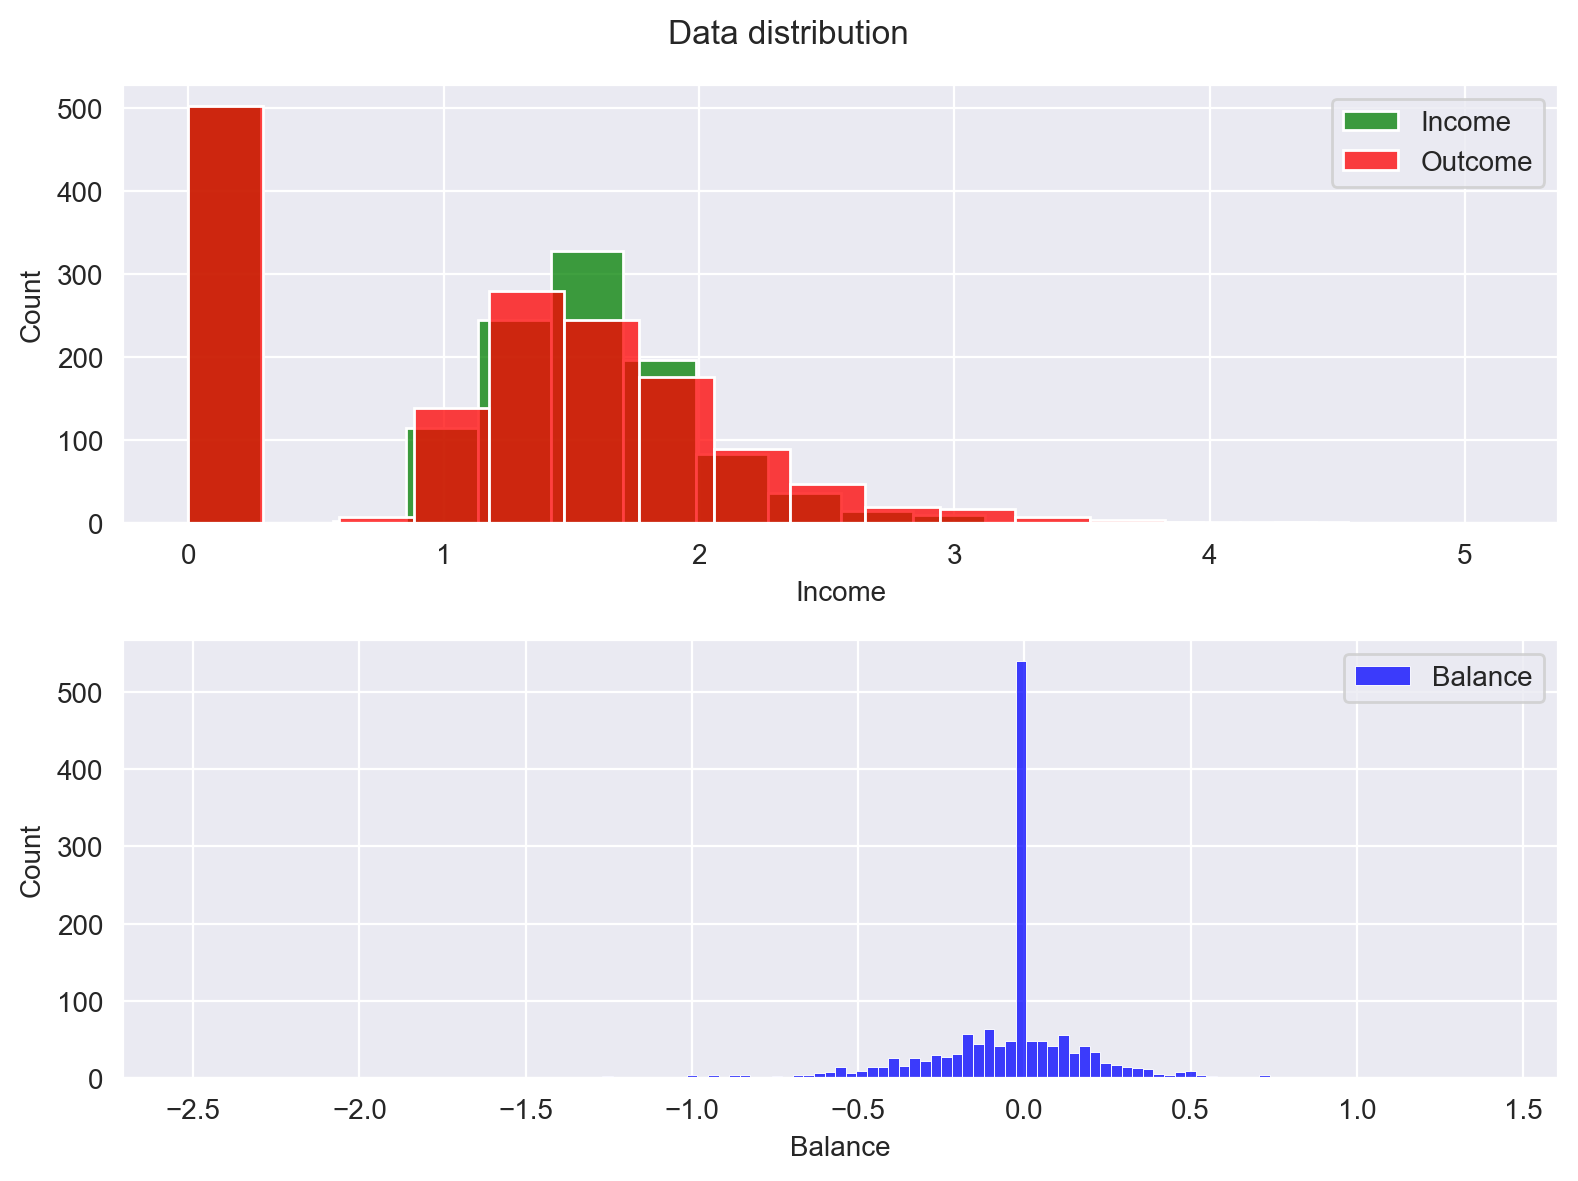

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.histplot(data=data, x='Income', ax=ax1, color='green', label='Income')
sns.histplot(data=data, x='Outcome', ax=ax1, color='red', label='Outcome')
ax1.legend()

sns.histplot(data=data, x='Balance', ax=ax2, color='blue', label='Balance')
ax2.legend()

plt.suptitle('Data distribution')
plt.tight_layout()
plt.show()

<Axes: xlabel='week_day_name', ylabel='Count'>

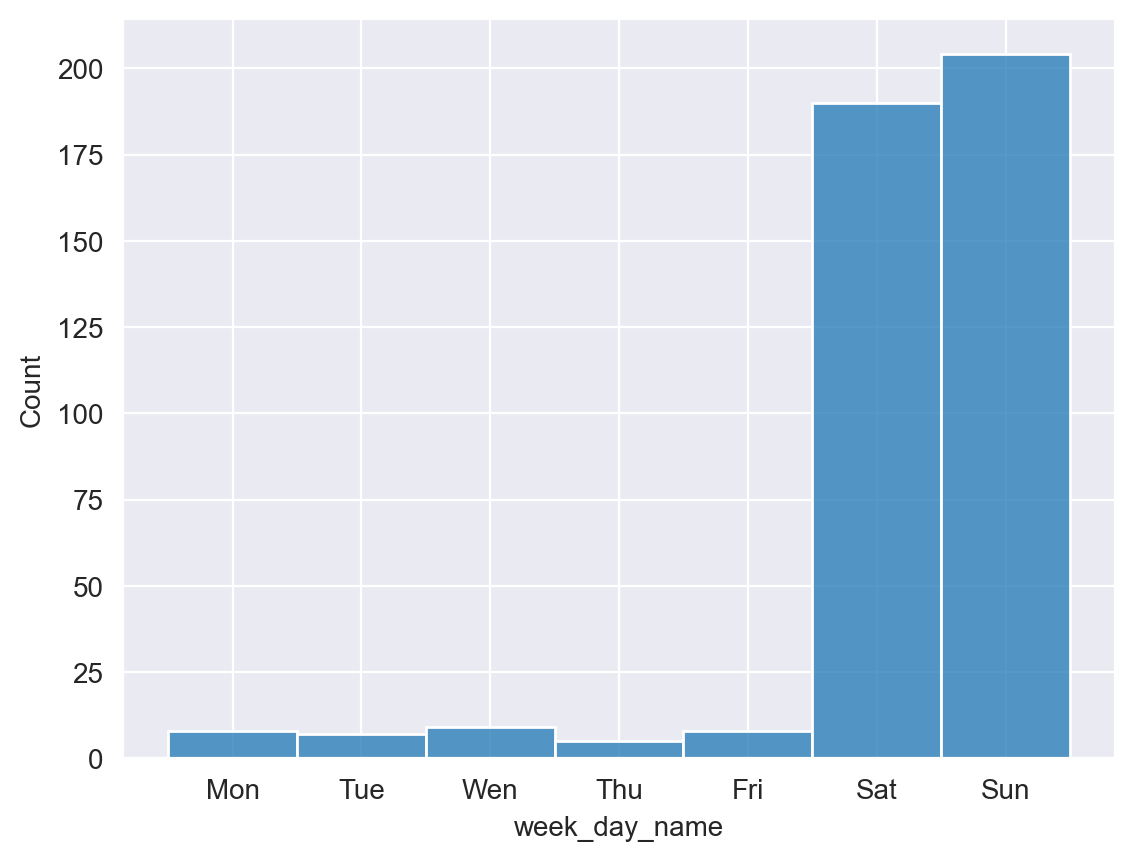

In [8]:
week_day_dict = {
    0:"Mon",
    1:"Tue",
    2:"Wen",
    3:"Thu",
    4:"Fri",
    5:"Sat",
    6:"Sun"
}

data['week_day_name'] = data['week_day'].map(week_day_dict)

sns.histplot(
    data=data[(data['Income'] == 0) & (data['Outcome'] == 0)].sort_values(by='week_day'),
    x='week_day_name')

__Вывод:__

Видно, что нули чаще всего встречаются по выходным дням. Однако по воскресеньям - чаще. Скорее всего это были рабочие субботы. Надо проверить все выходные.

In [9]:
#!pip install holidays

In [10]:
import holidays
cal_h = holidays.RU()

def is_holiday(date):
    return date in cal_h

data['is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))

In [11]:
zero_data = data[(data['Income'] <= 2e-1) & (data['Outcome'] <= 2e-1)]
clear_data = data.drop(zero_data.index)
clear_data = clear_data.set_index('Timestamp')

print(f"Percent of zeros: {round(len(zero_data)/len(data), 3) * 100} %")

Percent of zeros: 32.5 %


In [12]:
pd.set_option('display.max_rows', 100)
data[data['is_holiday']]

,Timestamp,Income,Outcome,Balance,Date,week_day,week_day_name,is_holiday
45,2017-02-23,0.000000,0.000000e+00,0.000000e+00,2017-02-23,3,Thu,True
46,2017-02-24,0.058229,5.135249e-03,5.309351e-02,2017-02-24,4,Fri,True
58,2017-03-08,0.000000,0.000000e+00,0.000000e+00,2017-03-08,2,Wen,True
112,2017-05-01,0.000000,0.000000e+00,0.000000e+00,2017-05-01,0,Mon,True
119,2017-05-08,0.000000,0.000000e+00,0.000000e+00,2017-05-08,0,Mon,True
120,2017-05-09,0.000000,0.000000e+00,0.000000e+00,2017-05-09,1,Tue,True
154,2017-06-12,0.000000,0.000000e+00,0.000000e+00,2017-06-12,0,Mon,True
299,2017-11-04,0.000000,0.000000e+00,0.000000e+00,2017-11-04,5,Sat,True
301,2017-11-06,0.000000,0.000000e+00,0.000000e+00,2017-11-06,0,Mon,True
357,2018-01-01,0.000000,0.000000e+00,0.000000e+00,2018-01-01,0,Mon,True


__Выводы:__

* на январских праздниках не работаем только 1-го и 2-го в остальные дни проходит маленький поток
* в праздники 8 марта и 23 февраля не работаем, за день до и после проходит маленький поток

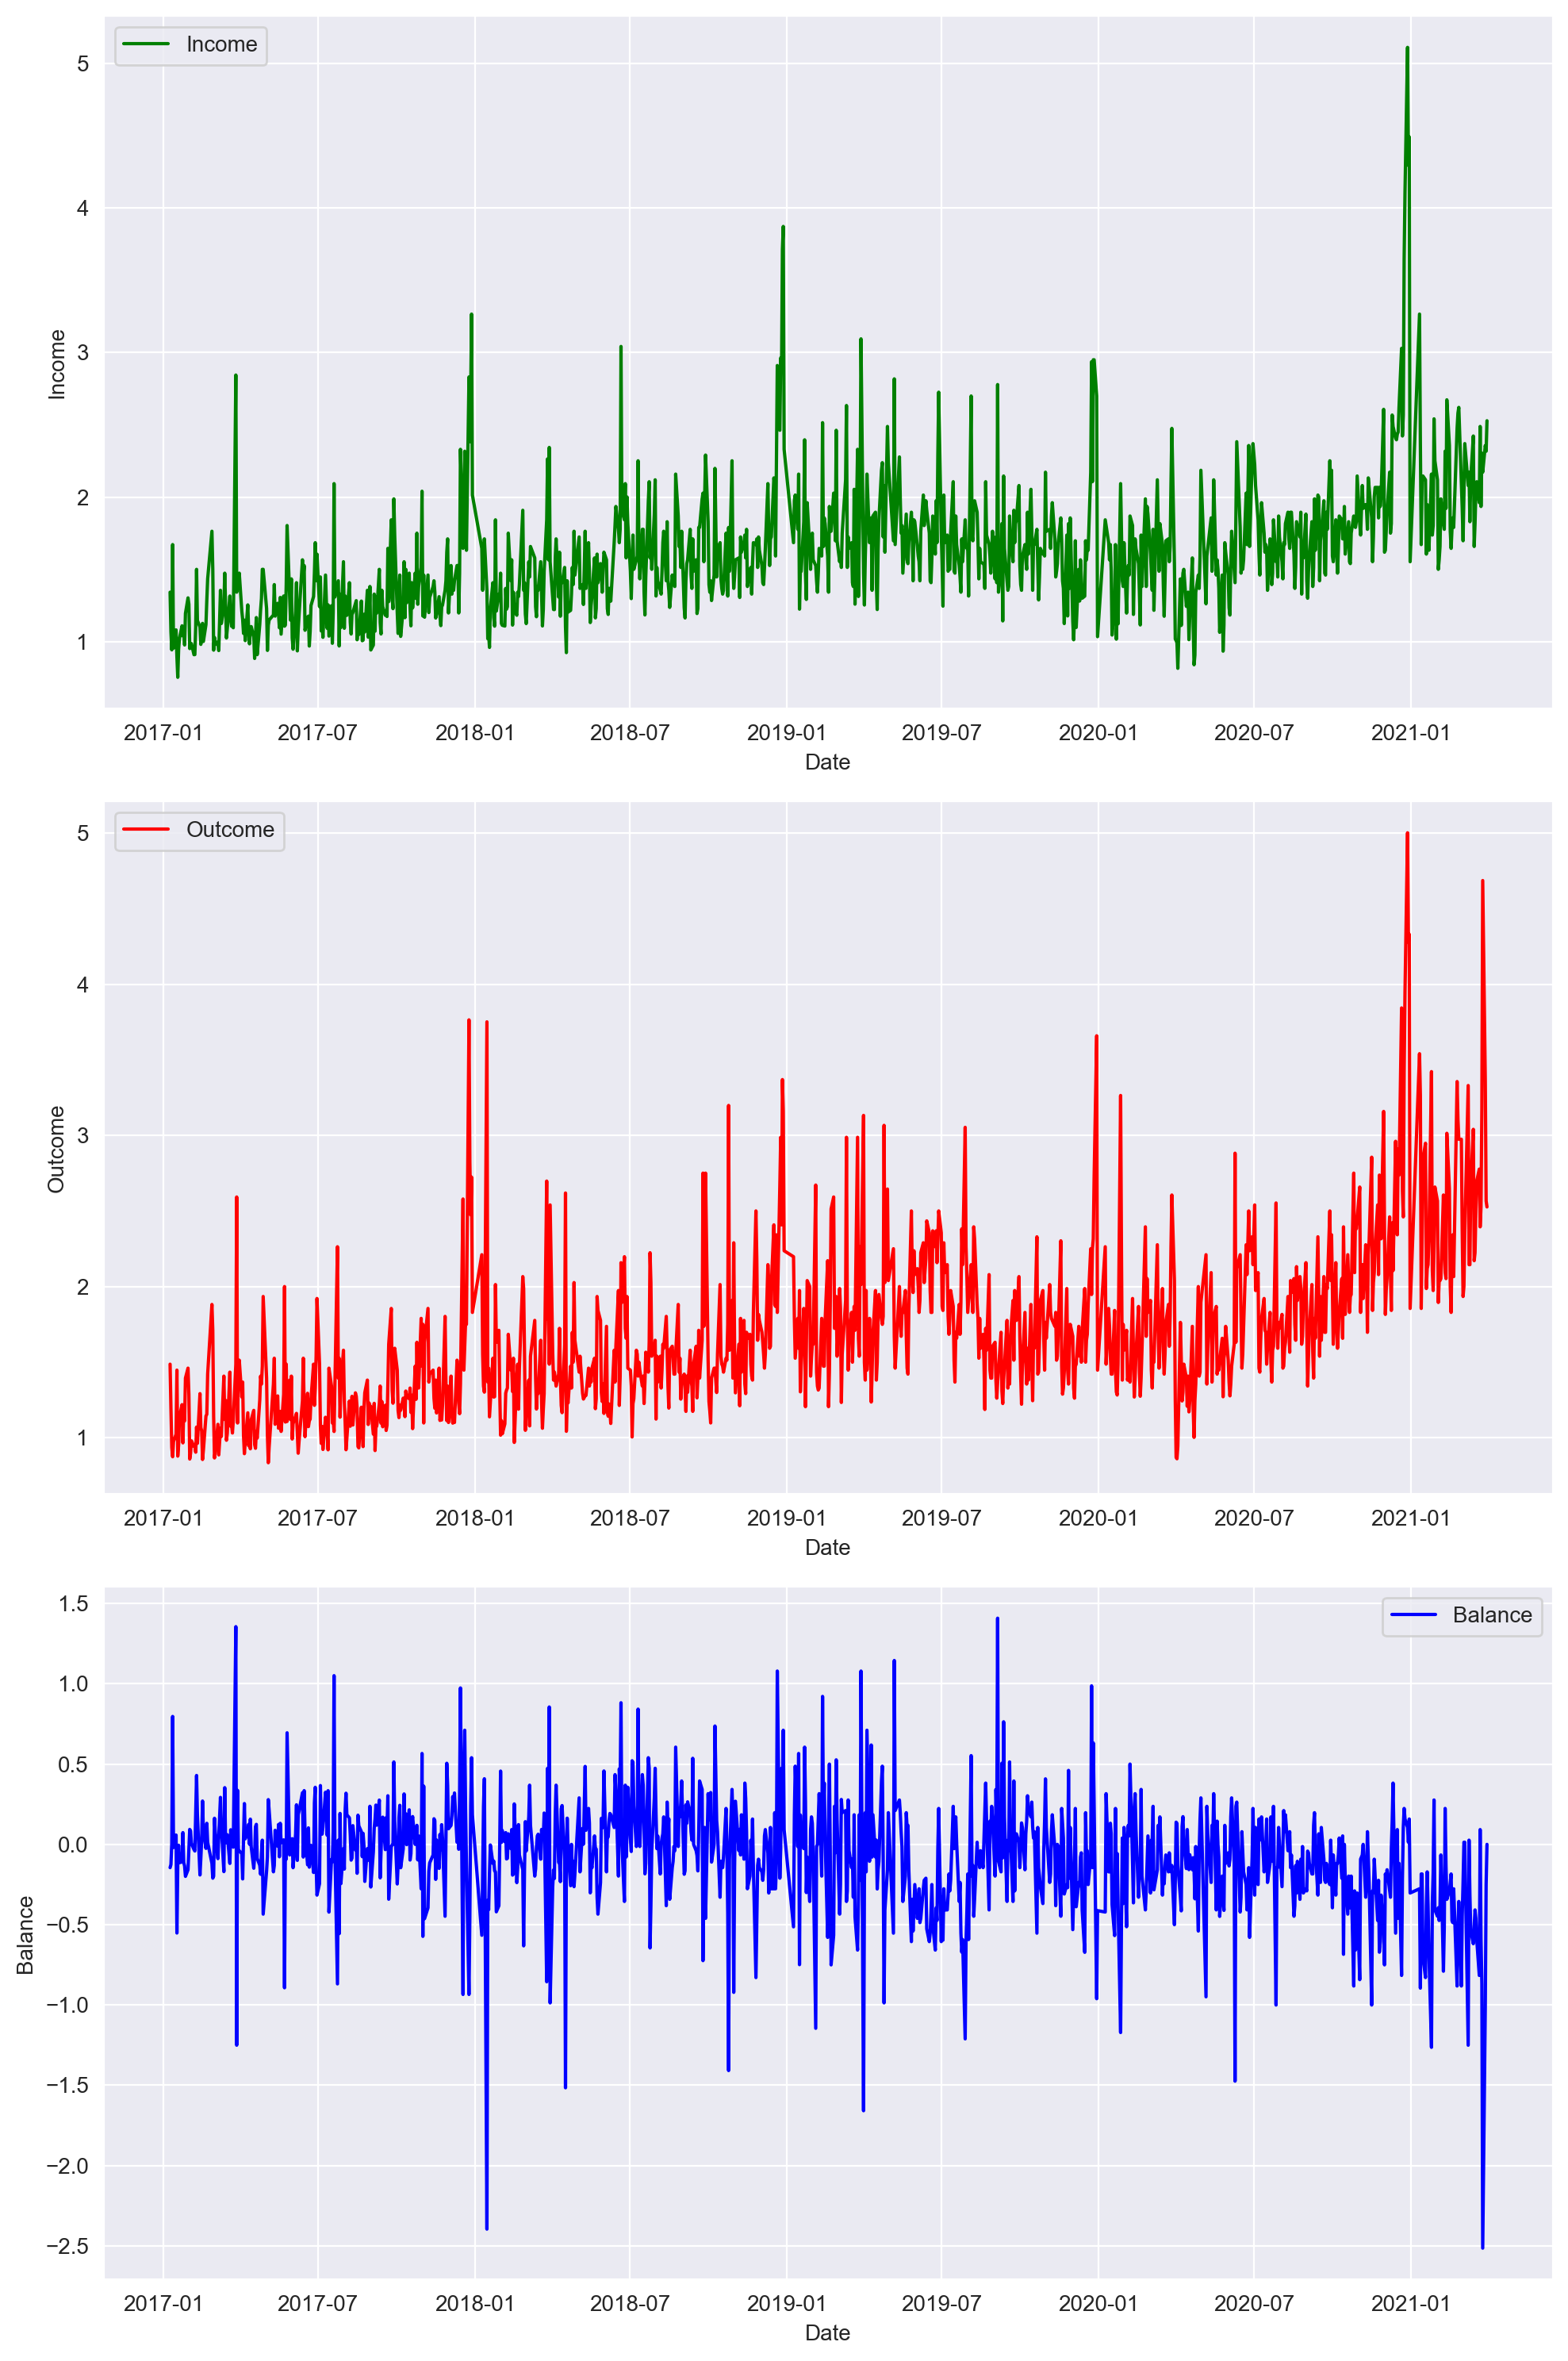

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(data=clear_data, x='Date', y='Income', ax=ax1, color='green', label='Income')
sns.lineplot(data=clear_data, x='Date', y='Outcome', ax=ax2, color='red', label='Outcome')
sns.lineplot(data=clear_data, x='Date', y='Balance', ax=ax3, color='blue', label='Balance')

plt.tight_layout()
plt.show()

### Пики в данных

In [14]:
def minmax(x):
    q = x - np.nanmin(x)
    r = np.nanmax(x) - np.nanmin(x)
    return q / r

def show_heat_map(data, col, month_norm=True):
    data_heat=data.copy()
    data_heat = data_heat.groupby([data_heat.index.month, data_heat.index.day]).agg({col:"mean"})
    data_heat.index.names = ['month', 'day']
    data_heat=data_heat.reset_index()

    if month_norm:
        data_heat[col] = data_heat[col].groupby(data_heat['month']).transform(lambda x: minmax(x))
    data_heat = data_heat.pivot(index='month', columns='day')
    data_heat=data_heat[col]
    data_heat.index = [calendar.month_abbr[x] for x in data_heat.index]

    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(data_heat, cmap="RdBu_r")
    plt.title(f'HeatMap of {col}')
    plt.show()

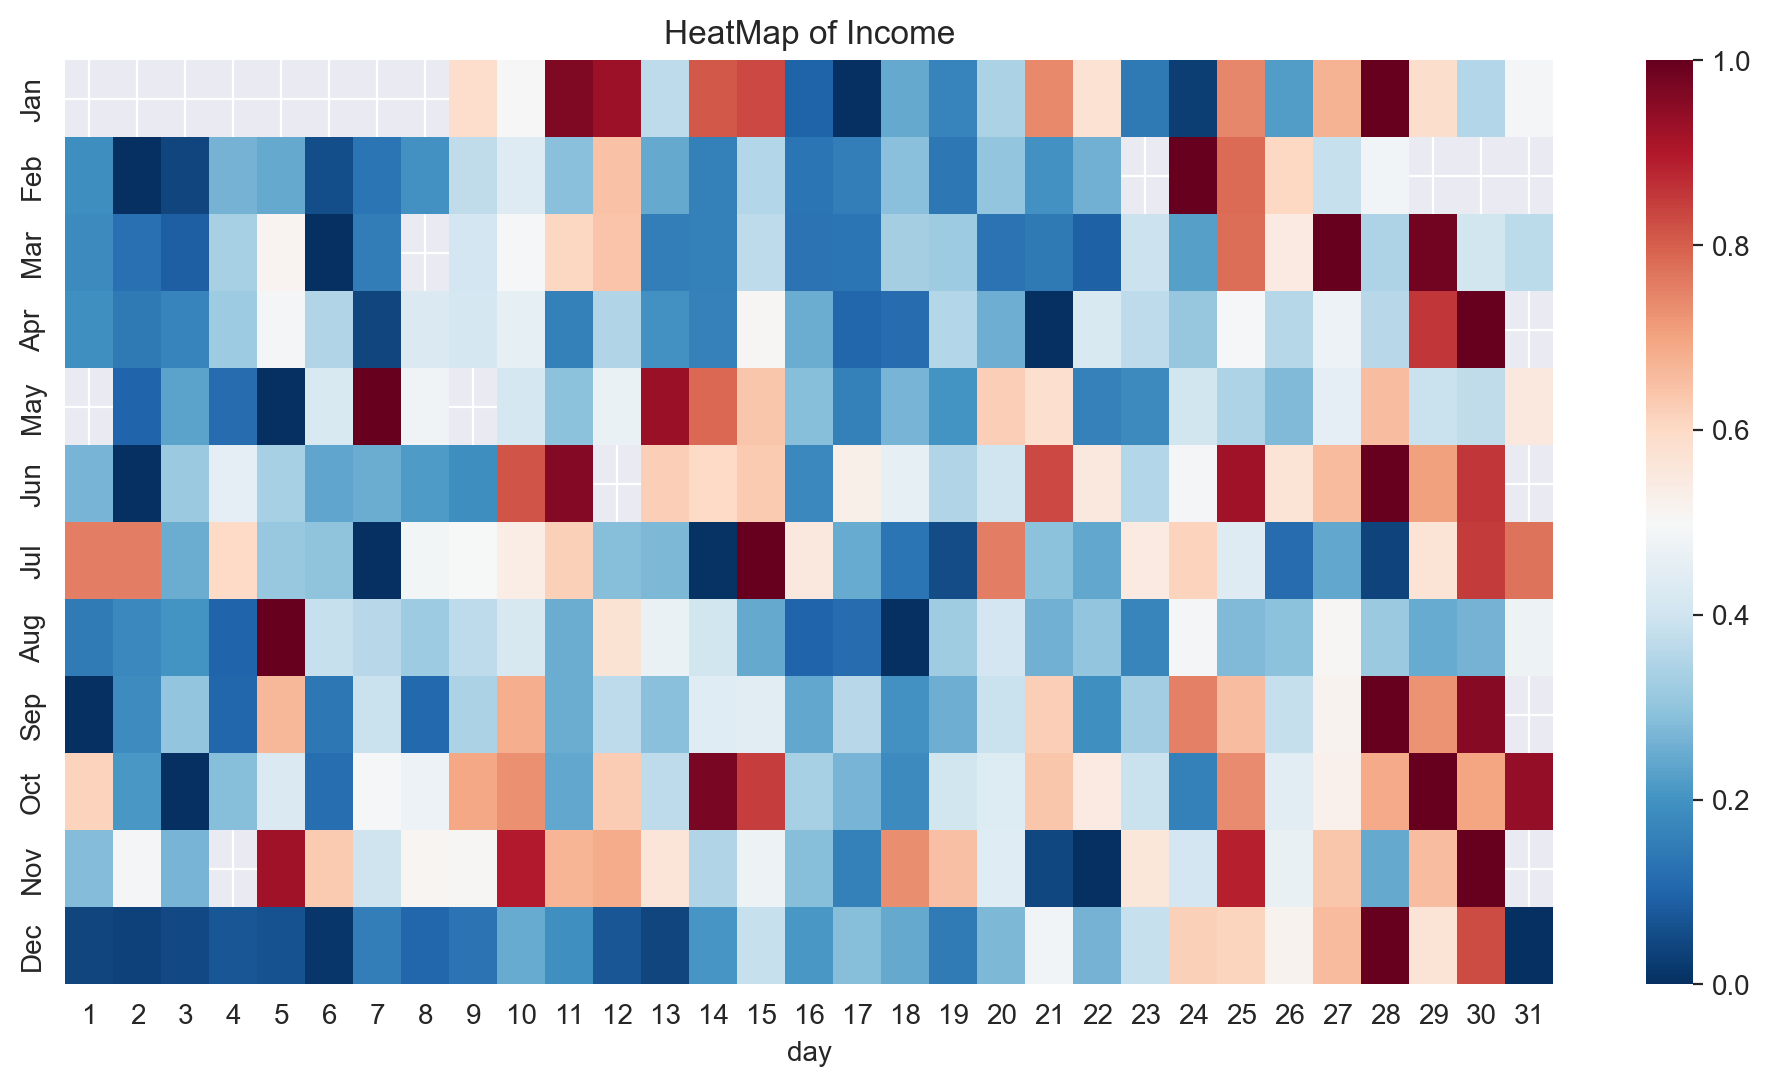

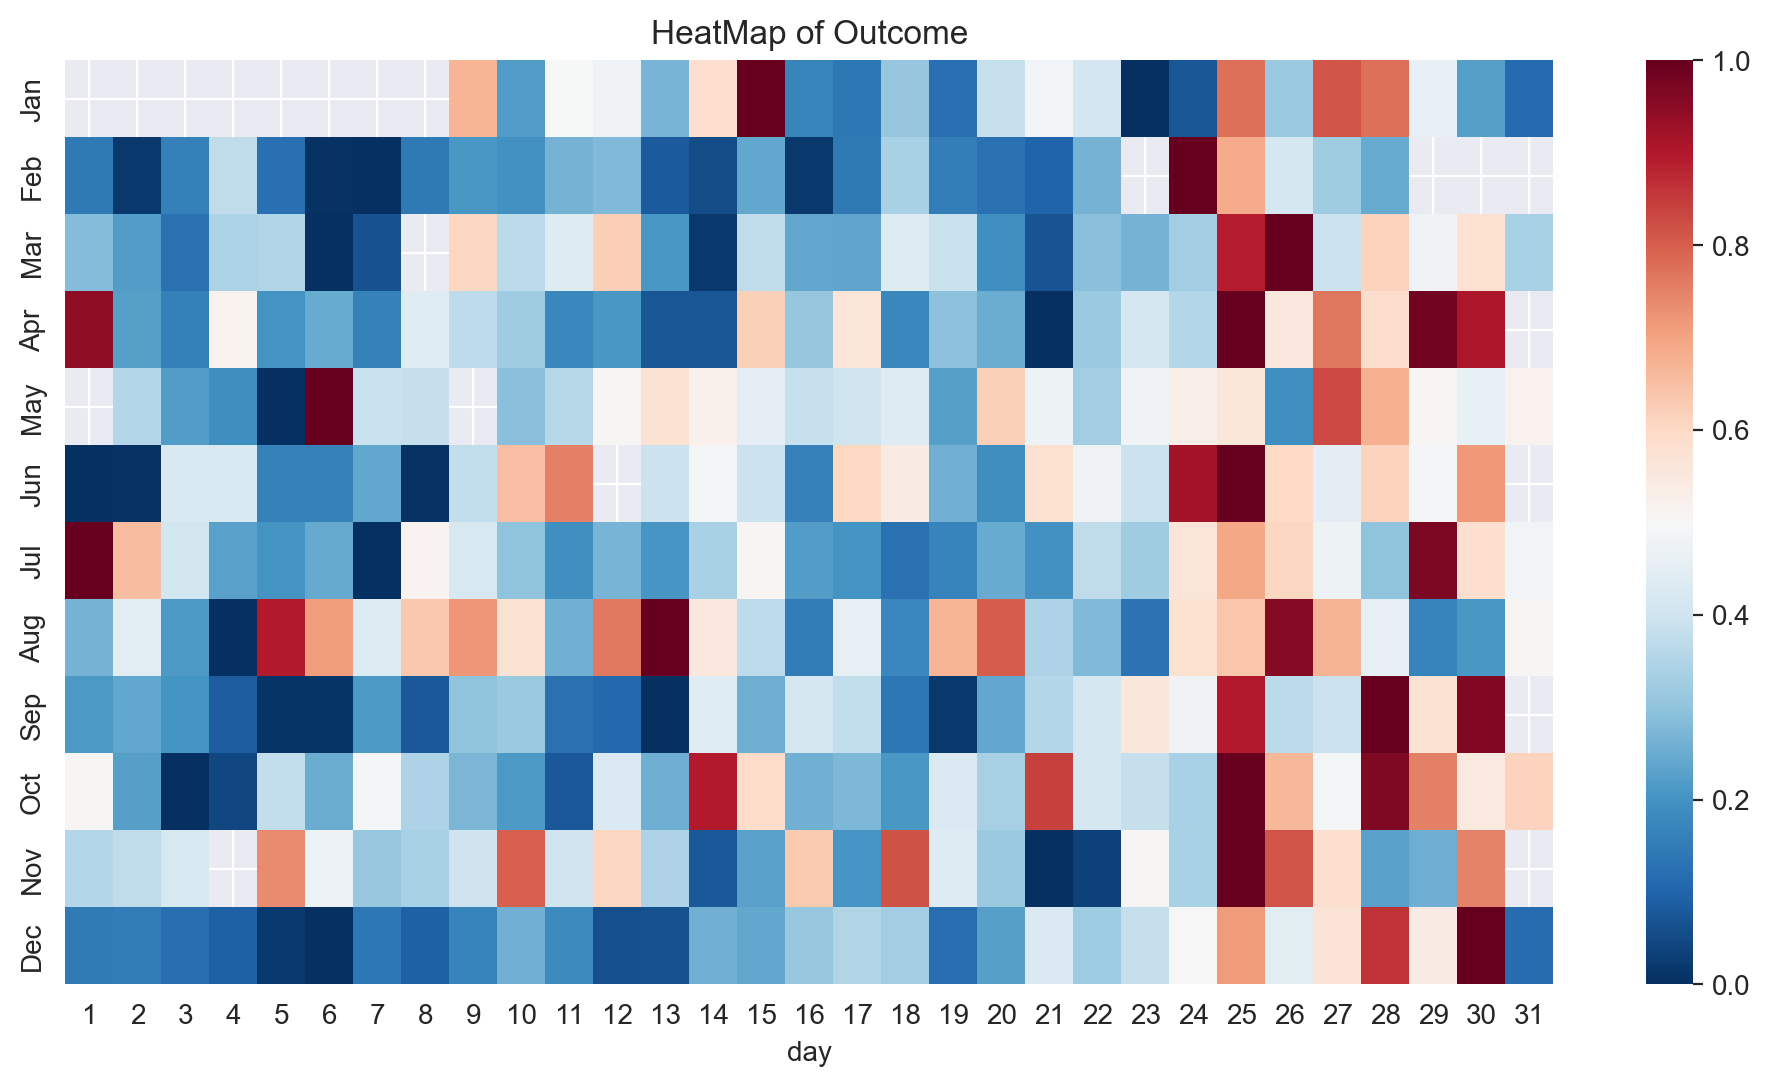

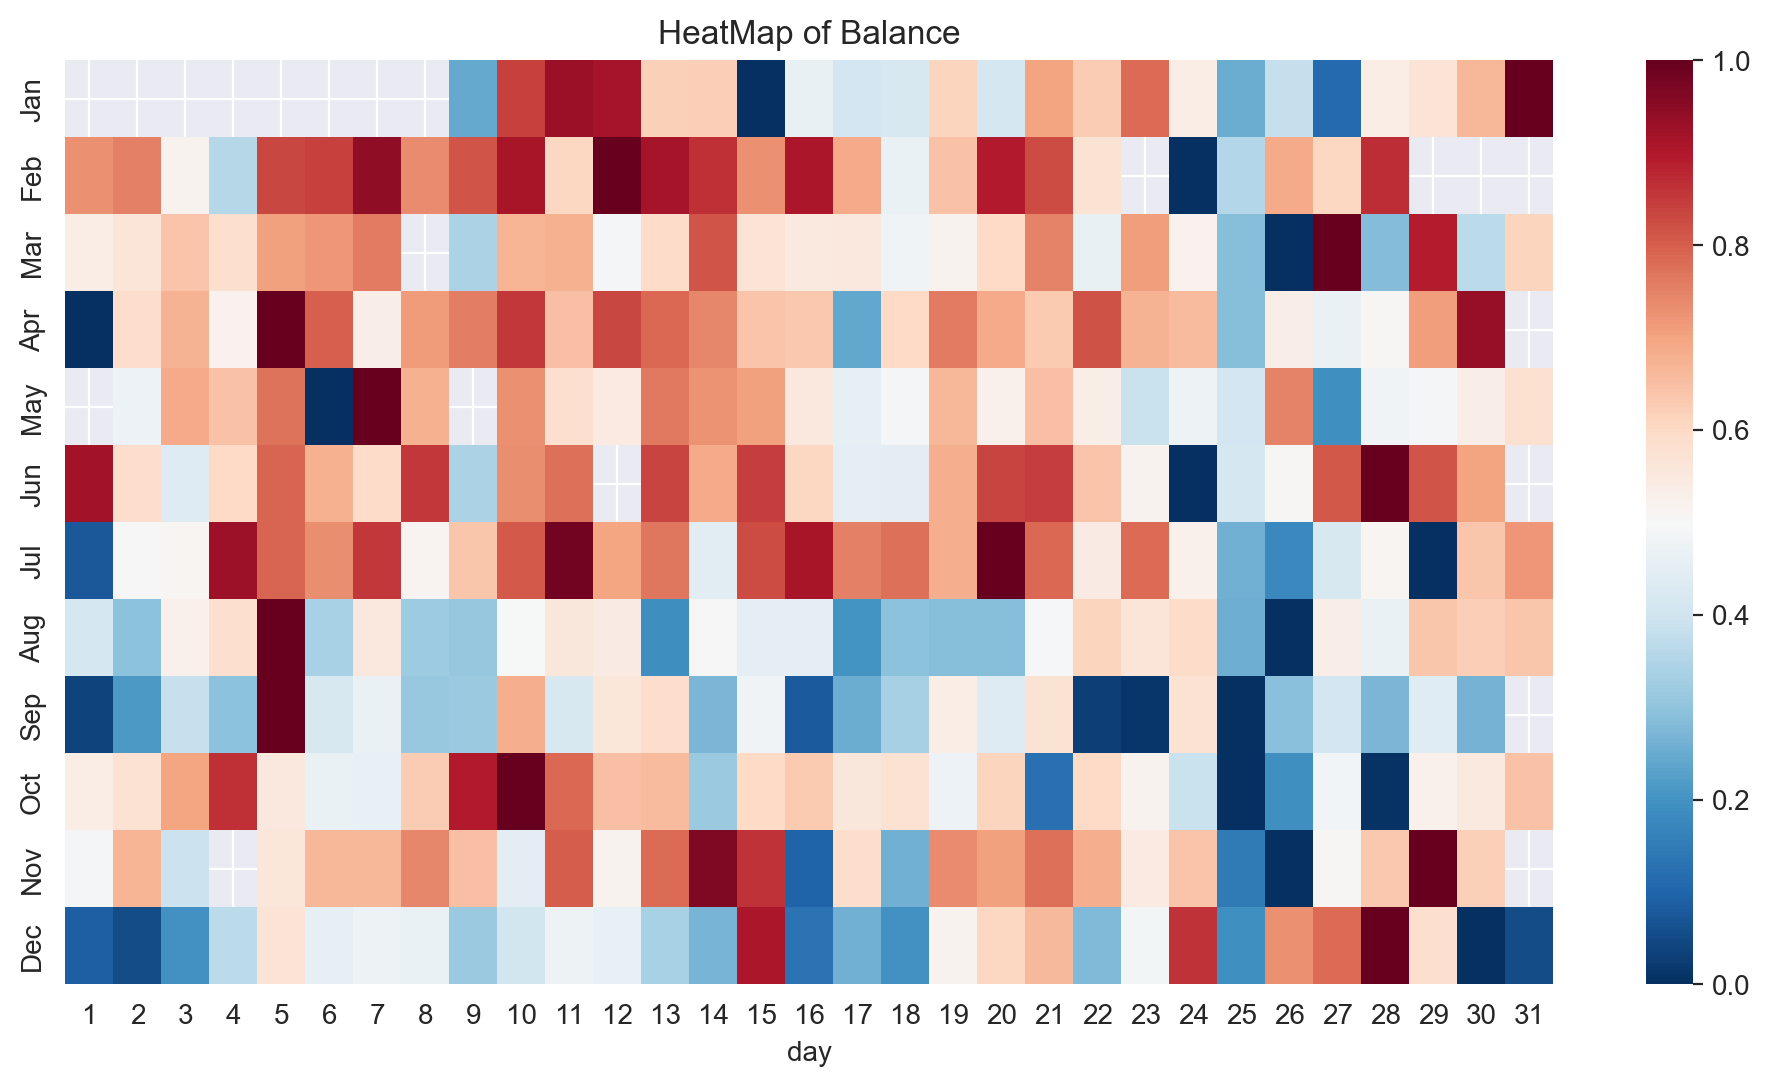

In [15]:
show_heat_map(clear_data, 'Income')
show_heat_map(clear_data, 'Outcome')
show_heat_map(clear_data, 'Balance')

Text(0.5, 1.0, 'Средние показатели по каледарным дням')

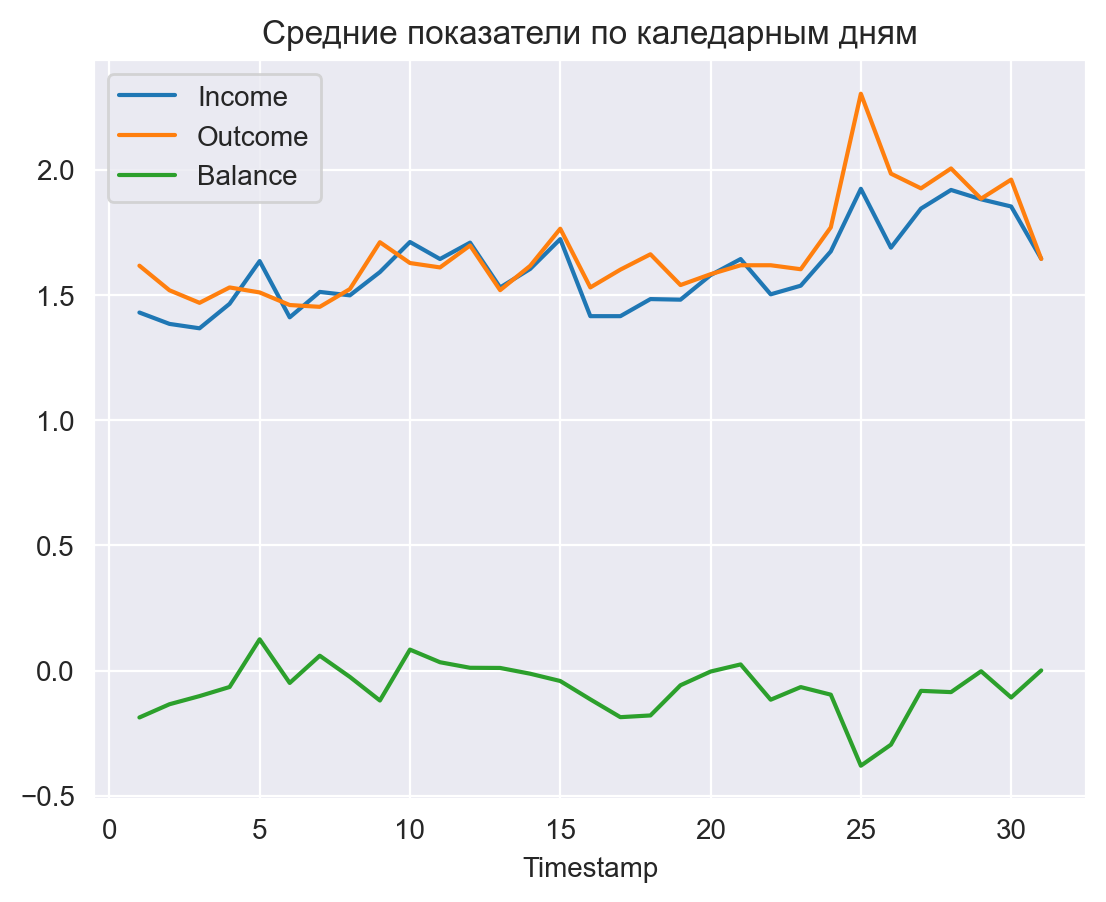

In [16]:
day_grouped_data = clear_data.groupby(by=clear_data.index.day).agg({'Income':'mean', 'Outcome':'mean', 'Balance':'mean'})
sns.lineplot(data=day_grouped_data, x=day_grouped_data.index, y='Income', label='Income')
sns.lineplot(data=day_grouped_data, x=day_grouped_data.index, y='Outcome', label='Outcome')
sns.lineplot(data=day_grouped_data, x=day_grouped_data.index, y='Balance', label='Balance')

plt.ylabel('')
plt.title('Средние показатели по каледарным дням')

In [17]:
def mark_tax_days(df, tax_name, tax_day=25):
    df = df.copy()
    df[tax_name] = 0
    
    for year in clear_data.index.year.unique():
        for month in clear_data.index.month.unique():
            next_days = clear_data[
                (clear_data.index.day >= 25)&\
                (clear_data.index.year == year)&\
                (clear_data.index.month == month)   
            ]

            next_working_day = next_days[next_days['week_day'].isin([0,1,2,3,4])].first_valid_index()
            if next_working_day is not None:
                df.loc[next_working_day, tax_name] = 1
    
    return df

In [18]:
clear_data = mark_tax_days(clear_data, 'tax_day', tax_day=25)
clear_data

,Income,Outcome,Balance,Date,week_day,week_day_name,is_holiday,tax_day
Timestamp,,,,,,,,
2017-01-09,1.343028,1.487865,-0.144836,2017-01-09,0,Mon,False,0
2017-01-10,1.068610,1.194182,-0.125572,2017-01-10,1,Tue,False,0
2017-01-11,0.944429,0.936663,0.007767,2017-01-11,2,Wen,False,0
2017-01-12,1.672202,0.875379,0.796823,2017-01-12,3,Thu,False,0
2017-01-13,0.955924,0.975645,-0.019721,2017-01-13,4,Fri,False,0
...,...,...,...,...,...,...,...,...
2021-03-25,2.304215,3.173234,-0.869018,2021-03-25,3,Thu,False,1
2021-03-26,2.172546,4.687433,-2.514887,2021-03-26,4,Fri,False,0
2021-03-29,2.356883,3.370738,-1.013855,2021-03-29,0,Mon,False,0


__Выводы__:

*  Видим что 25 числа стабильно исходящие потоки превышаюи входящие (скорее всего налоги)

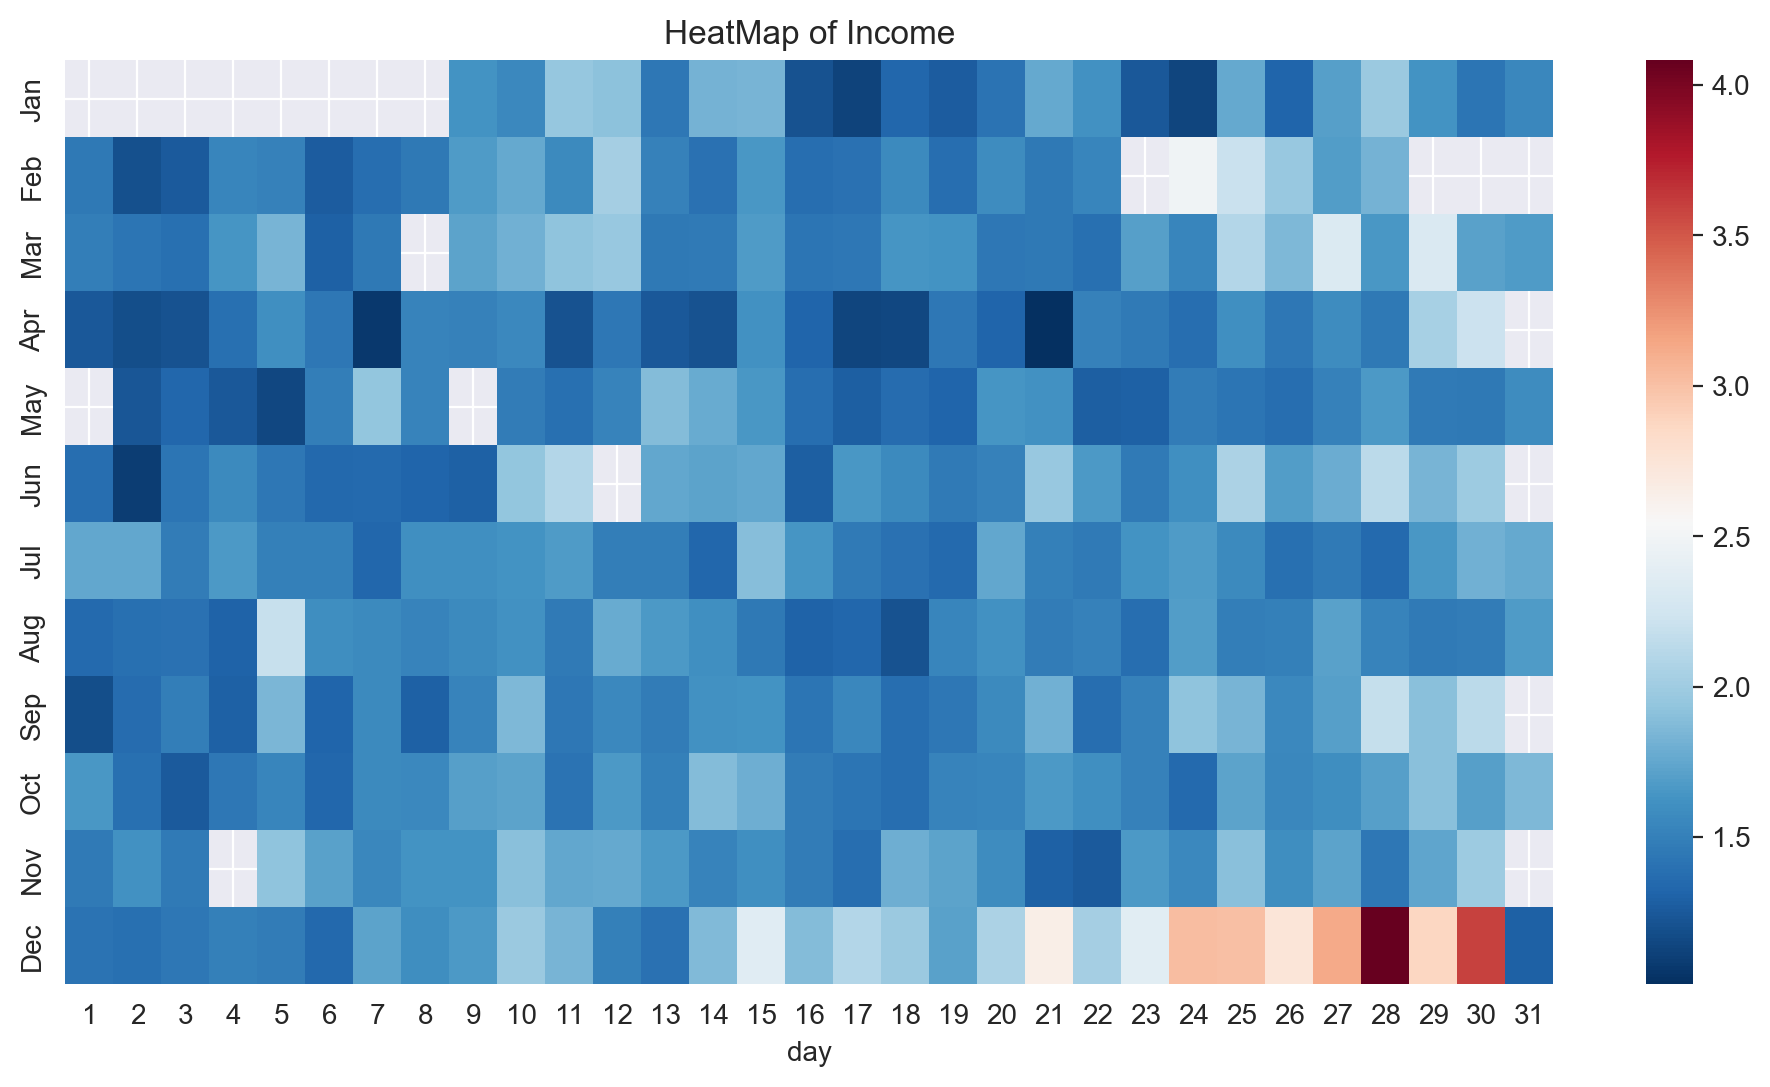

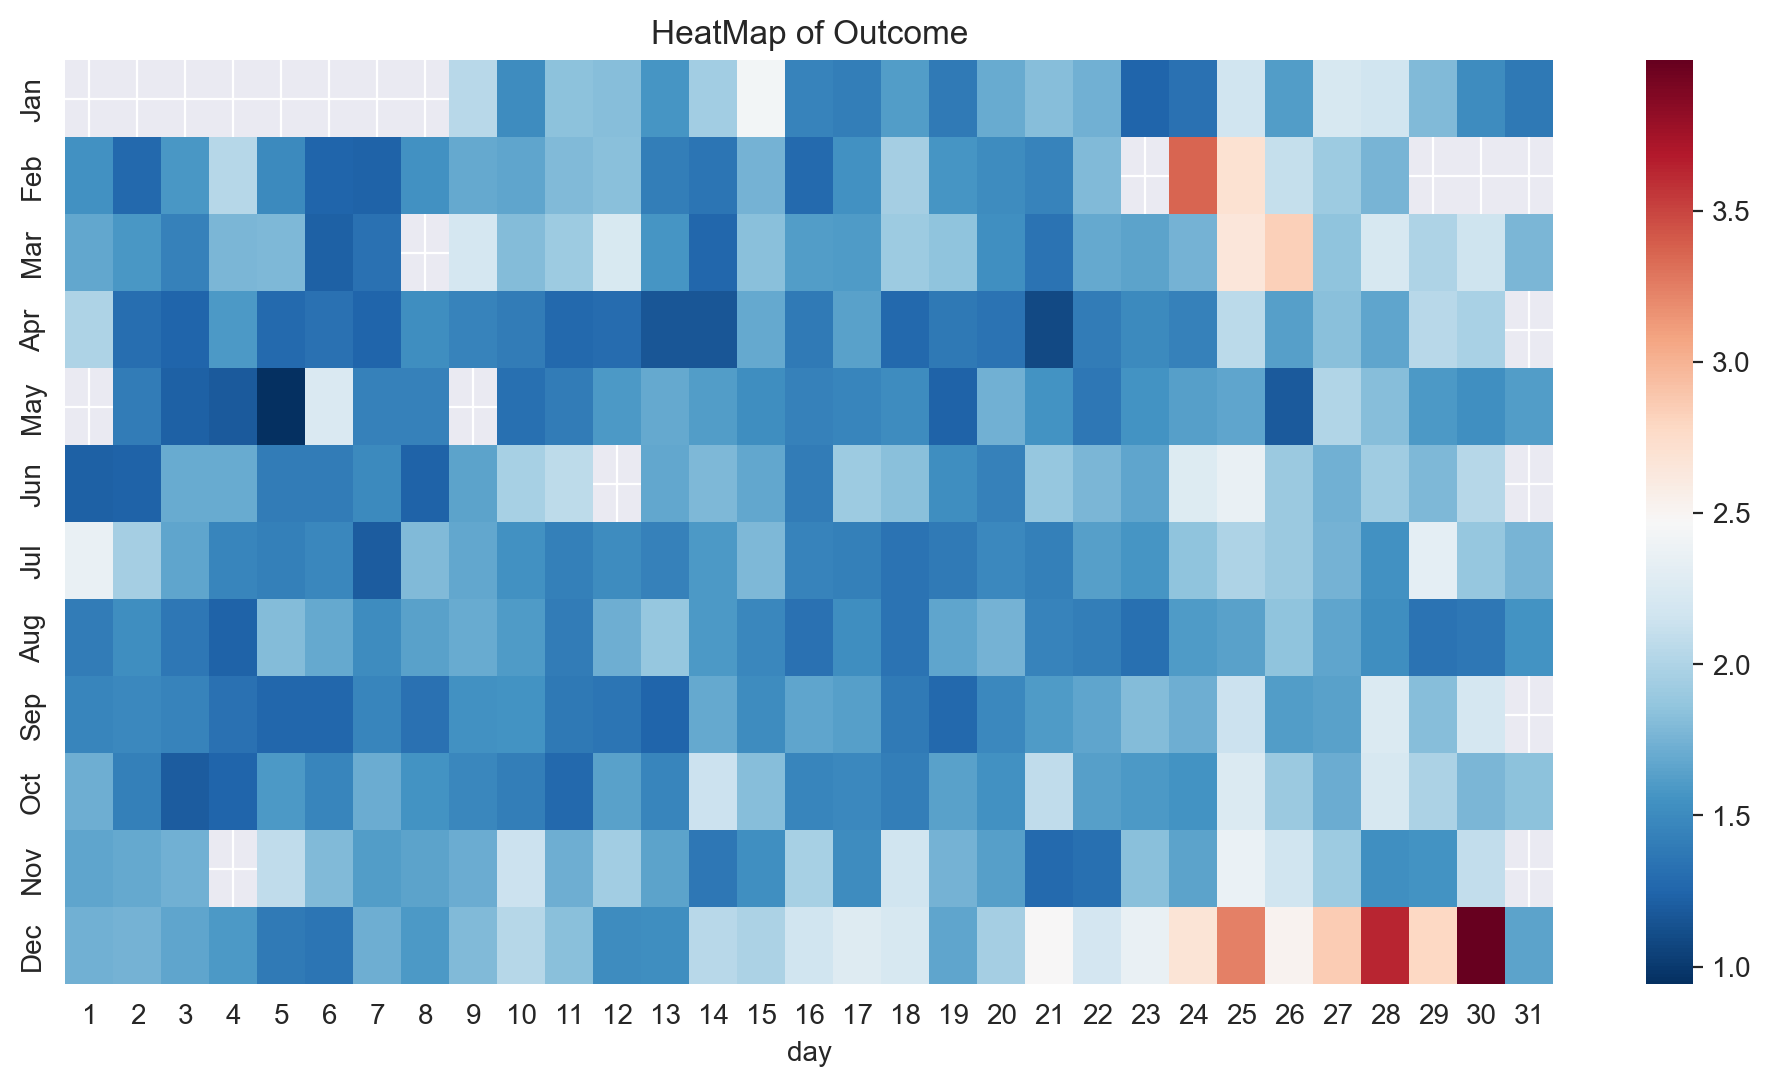

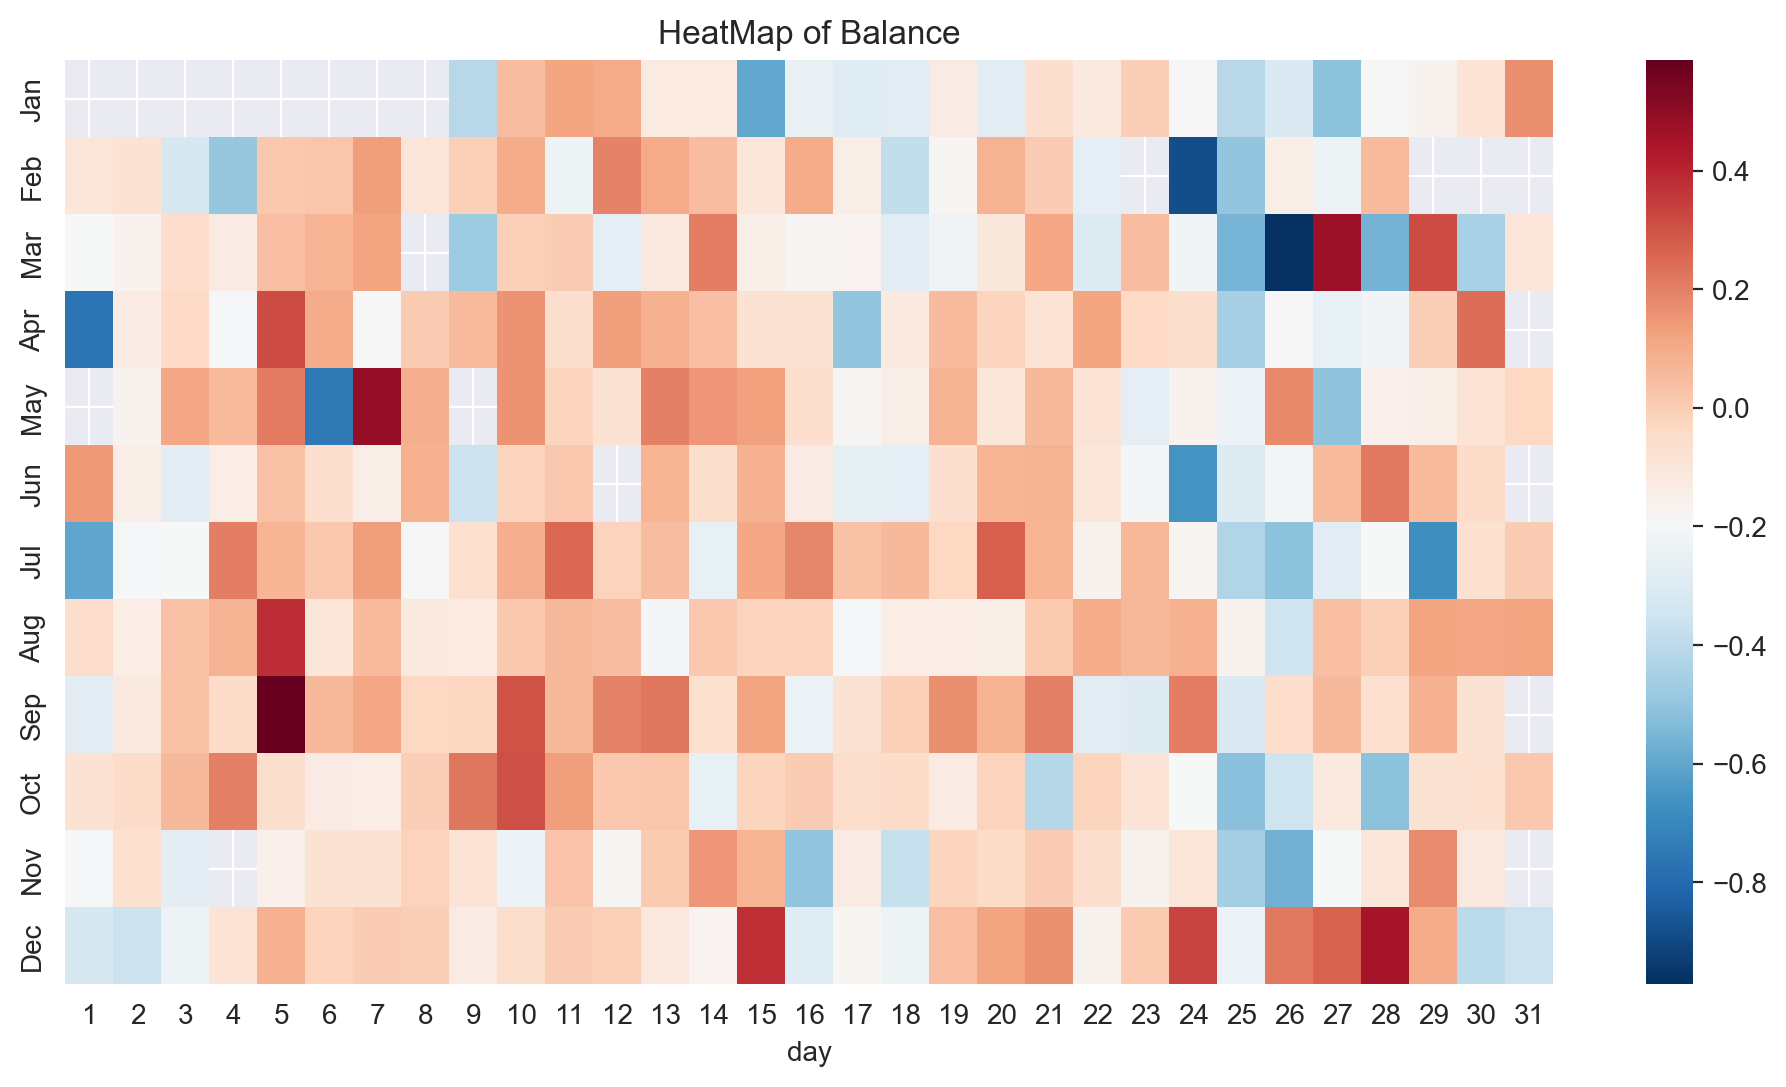

In [19]:
show_heat_map(clear_data, 'Income', month_norm=False)
show_heat_map(clear_data, 'Outcome', month_norm=False)
show_heat_map(clear_data, 'Balance', month_norm=False)

__Выводы__:

*  Самые пики по расходам и доходам начинаются в конце календарного года

### Вненешние данные

In [24]:
# ставка ЦБ
rate_russ = pd.read_excel("../data/Rate_russ.xlsx", dtype={
    "Дата":str,
    "Ключевая ставка, % годовых":float,
    "Инфляция, % г/г":float,
    "Цель по инфляции":float
})
rate_russ = rate_russ.rename(columns={
    "Дата":"Date",
    "Ключевая ставка, % годовых":"rate_russ",
    "Инфляция, % г/г":"real_inflation",
    "Цель по инфляции":"target_inflation"
})

rate_russ['Date'] = pd.to_datetime(rate_russ['Date'], format="%m.%Y")
rate_russ = rate_russ.set_index('Date')
rate_russ = rate_russ.asfreq('D')
rate_russ = rate_russ.bfill()
rate_russ['real_target_diff'] = rate_russ['target_inflation'] - rate_russ['real_inflation']

dataset = pd.merge(clear_data, rate_russ, how='left', left_index=True, right_index=True)

In [25]:
# ставка ФРС
rate_usa = pd.read_csv("../data/Rate_usa.csv", header=None, delimiter=';')
rate_usa = rate_usa.rename(columns={    
    0:"Date",
    1:"rate_usa"
})
rate_usa['Date'] = pd.to_datetime(rate_usa['Date'], format="%Y-%m-%d")
rate_usa = rate_usa.set_index('Date')
rate_usa = rate_usa.asfreq('D')
rate_usa = rate_usa.bfill()

dataset = pd.merge(dataset, rate_usa, how='left', left_index=True, right_index=True)

Text(0.5, 1.0, 'Ставки Центральных банков')

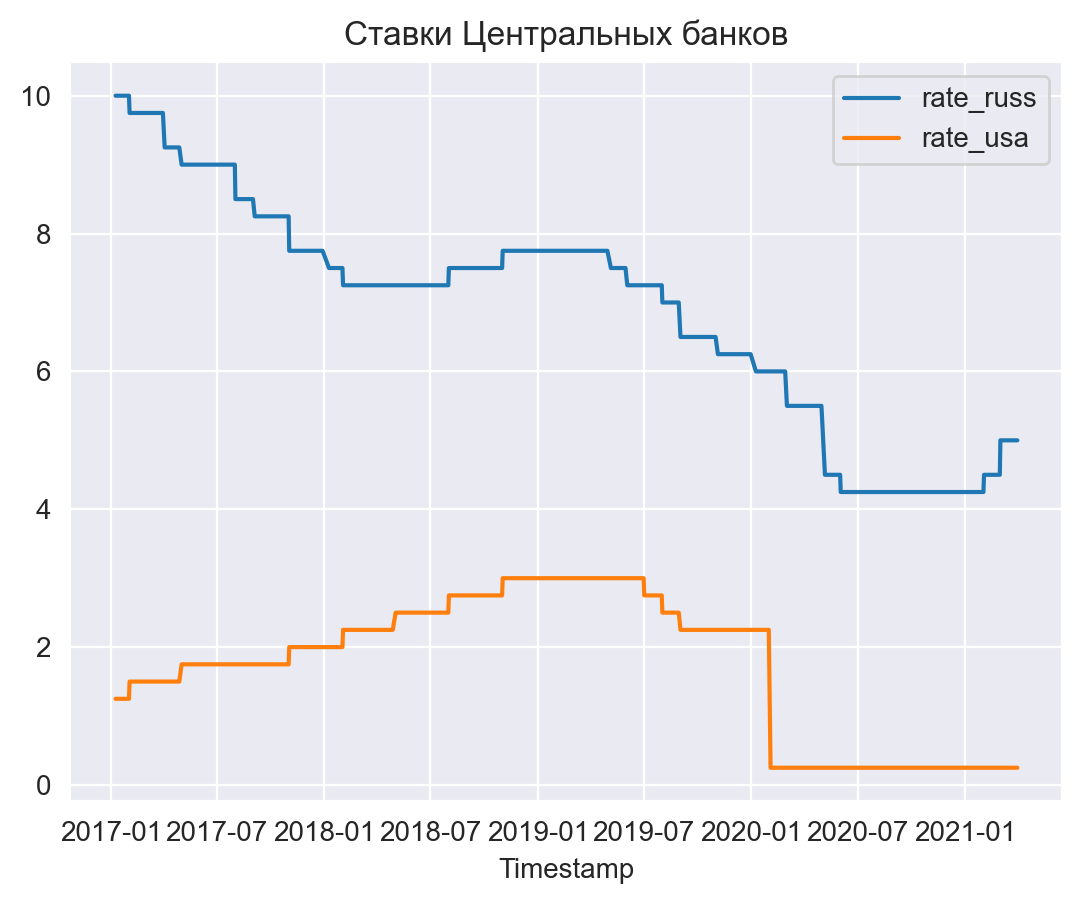

In [29]:
sns.lineplot(data=dataset, x=dataset.index, y='rate_russ', label='rate_russ')
sns.lineplot(data=dataset, x=dataset.index, y='rate_usa', label='rate_usa')

plt.ylabel('')
plt.title('Ставки Центральных банков')

In [31]:
dataset.to_csv("../data/dataset.csv")

____